In [7]:
library("mixOmics")
library("readxl")
library("dplyr")
library("tibble")
library("rgl")
library("tidyr")

### Import data 
#### Read the rpkm values

In [8]:
setwd("/Users/parbab/Desktop/RNA-seq/Results/Rat/")

In [9]:
genes <- read_excel("CAMeLEOm_Rat_rpkm.xlsx") %>%
        as.data.frame() %>%
        column_to_rownames("ENSEMBL") %>%
        t %>%
        as.data.frame() 

metadata <- read_xlsx("metadata_rat.xlsx") %>% 
            select(c("Subject Name", "Sample ID", "Condition1", "Condition2")) %>% 
            dplyr::rename(Diet = "Condition1", Treatment = "Condition2") %>%
            unite("Cohort" , Diet:Treatment)

In [10]:
data <- list("genes" = genes, "metadata" = metadata)

### PCA

#### Tuning

##### Scaled

Eigenvalues for the first 10 principal components, see object$sdev^2: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
7134.8224 2393.2385 1040.0109  788.3214  511.3617  490.9361  399.6974  263.3560 
      PC9      PC10 
 246.9025  199.2410 

Proportion of explained variance for the first 10 principal components, see object$explained_variance: 
       PC1        PC2        PC3        PC4        PC5        PC6        PC7 
0.45762443 0.15350128 0.06670585 0.05056259 0.03279852 0.03148843 0.02563642 
       PC8        PC9       PC10 
0.01689154 0.01583622 0.01277923 

Cumulative proportion explained variance for the first 10 principal components, see object$cum.var: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.4576244 0.6111257 0.6778316 0.7283942 0.7611927 0.7926811 0.8183175 0.8352091 
      PC9      PC10 
0.8510453 0.8638245 

 Other available components: 
 -------------------- 
 loading vectors: see object$rotatio

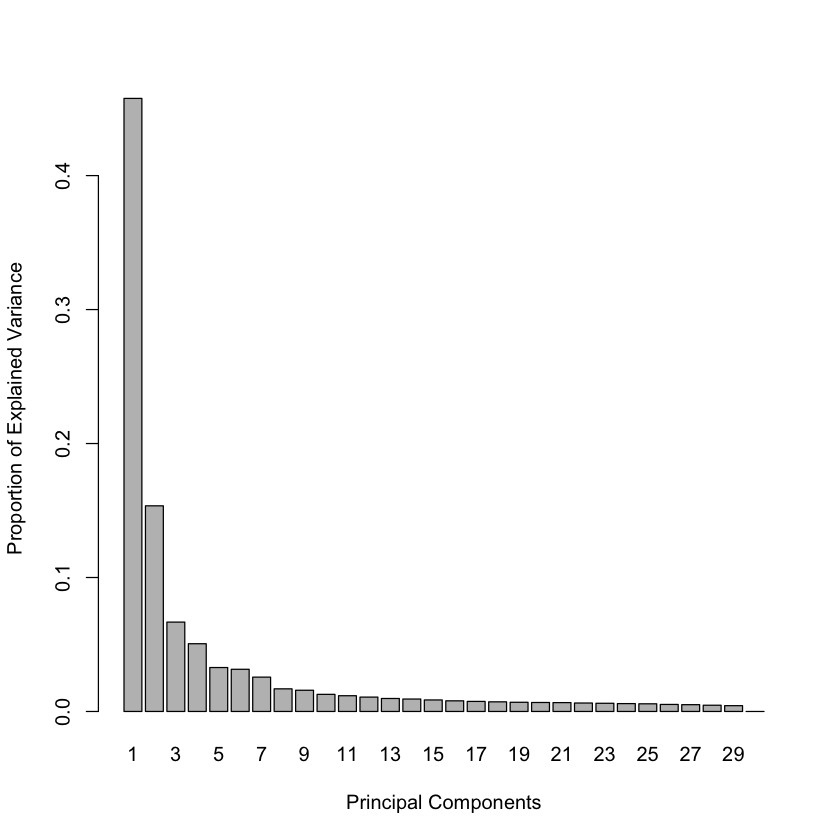

In [11]:
tune.pca(data$genes, center = TRUE, scale = TRUE)

##### Not scaled

Eigenvalues for the first 10 principal components, see object$sdev^2: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
4120.3645 2485.3880  899.6135  583.4743  359.6782  269.1657  201.1839  188.3914 
      PC9      PC10 
 123.5127  117.1019 

Proportion of explained variance for the first 10 principal components, see object$explained_variance: 
       PC1        PC2        PC3        PC4        PC5        PC6        PC7 
0.39243136 0.23671309 0.08568090 0.05557120 0.03425643 0.02563585 0.01916114 
       PC8        PC9       PC10 
0.01794275 0.01176358 0.01115301 

Cumulative proportion explained variance for the first 10 principal components, see object$cum.var: 
      PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8 
0.3924314 0.6291444 0.7148253 0.7703966 0.8046530 0.8302888 0.8494500 0.8673927 
      PC9      PC10 
0.8791563 0.8903093 

 Other available components: 
 -------------------- 
 loading vectors: see object$rotatio

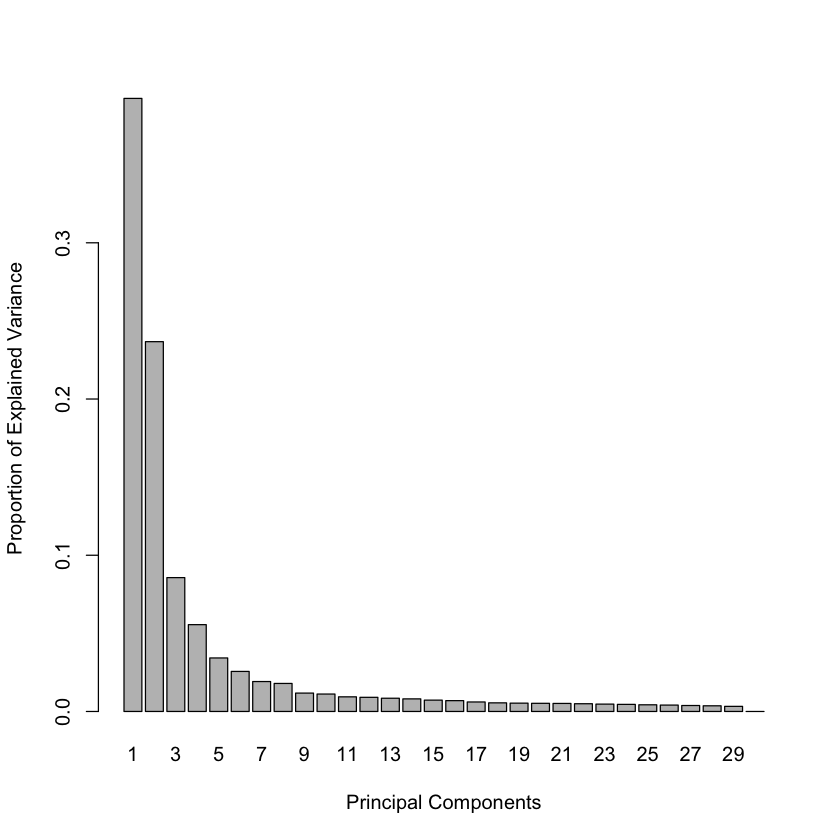

In [12]:
tune.pca(data$genes, center = TRUE, scale = FALSE)

#### Sample plots

##### Components 1 & 2

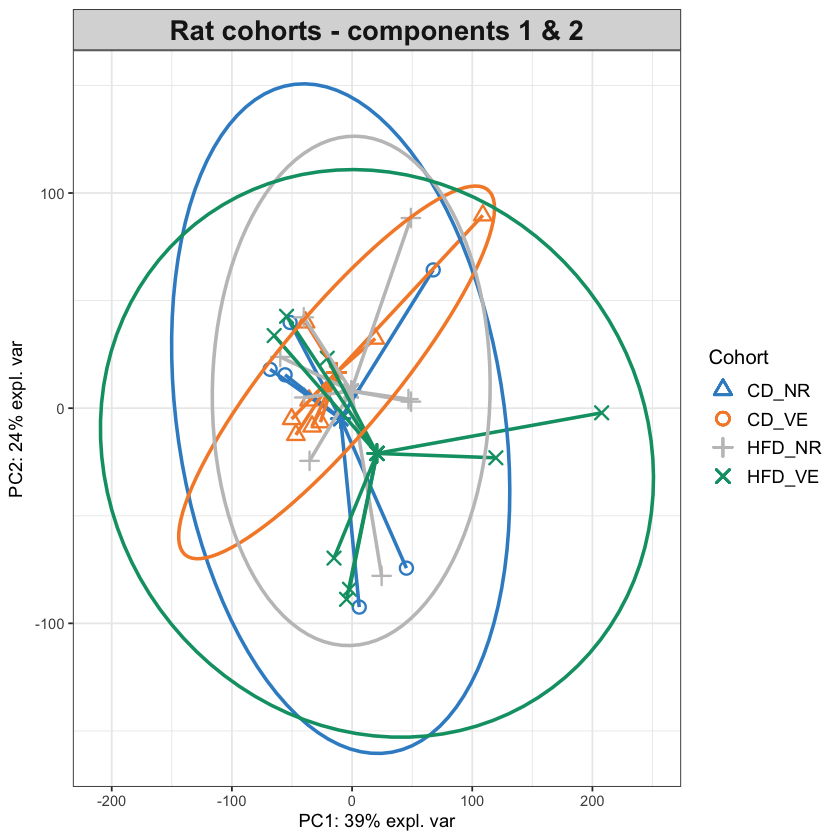

In [13]:
res.pca <- pca(data$genes, ncomp = 4)

plotIndiv(res.pca, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 1 & 2",
          ind.names = FALSE)

##### Components 1 & 3

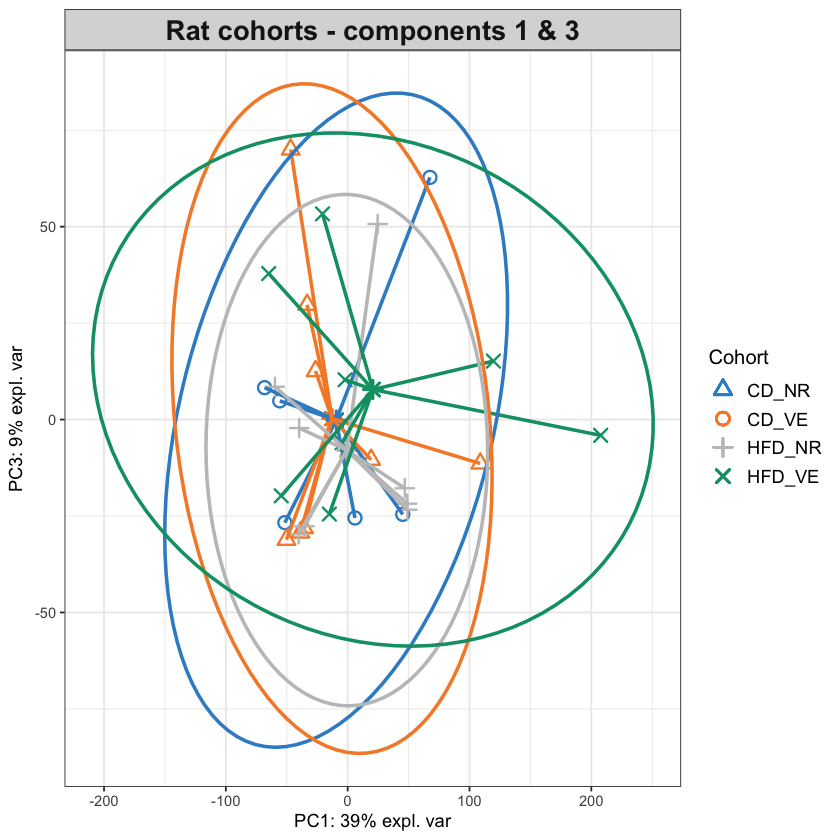

In [14]:
plotIndiv(res.pca, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 1 & 3",
          ind.names = FALSE,
          comp = c(1,3))

##### Components 2 & 3

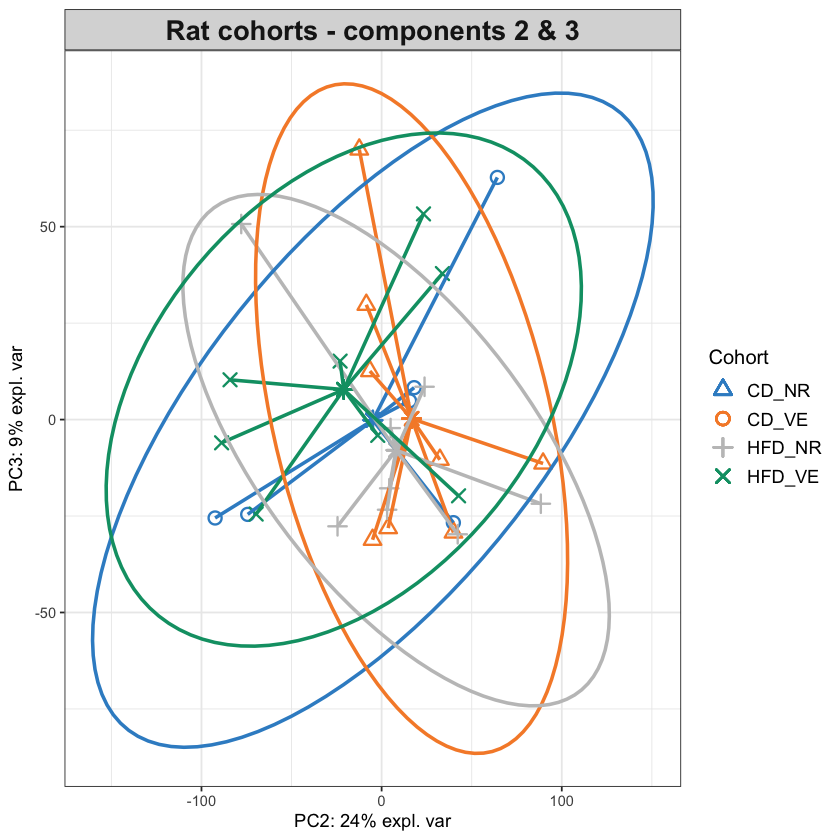

In [15]:
plotIndiv(res.pca, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 2 & 3",
          ind.names = FALSE,
          comp = c(2,3))

#### Variable plots

##### Correlation circle plot

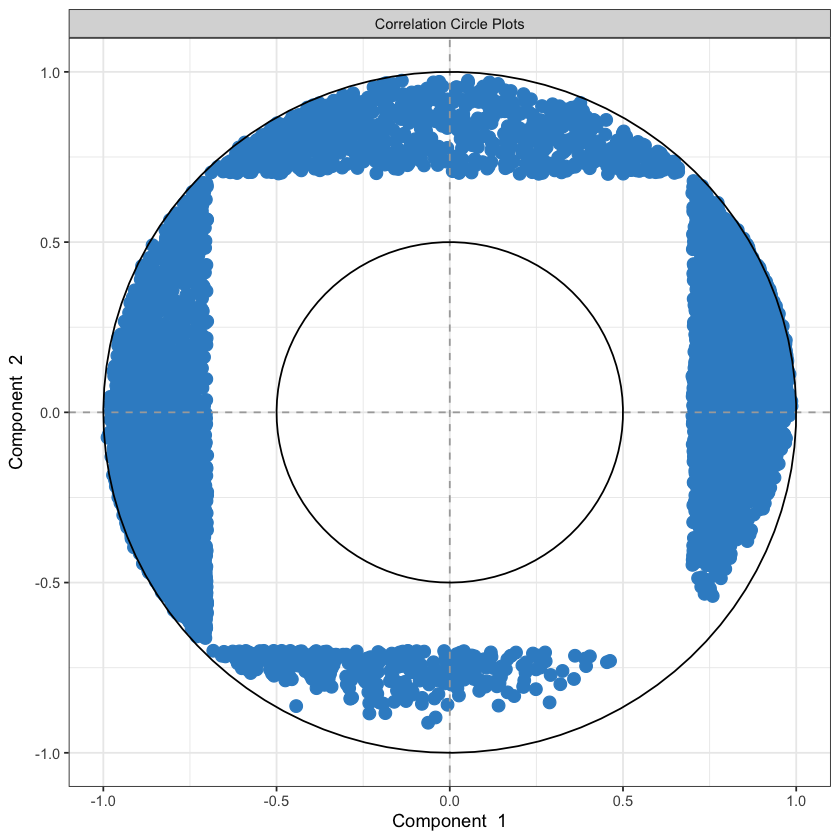

In [28]:
plotVar(res.pca, cutoff = 0.7, pch = 20)   

### sPCA

In [29]:
res.spca <- spca(data$genes, ncomp = 3, keepX = c(25,20,15))

#### Sample plots

##### Components 1 & 2

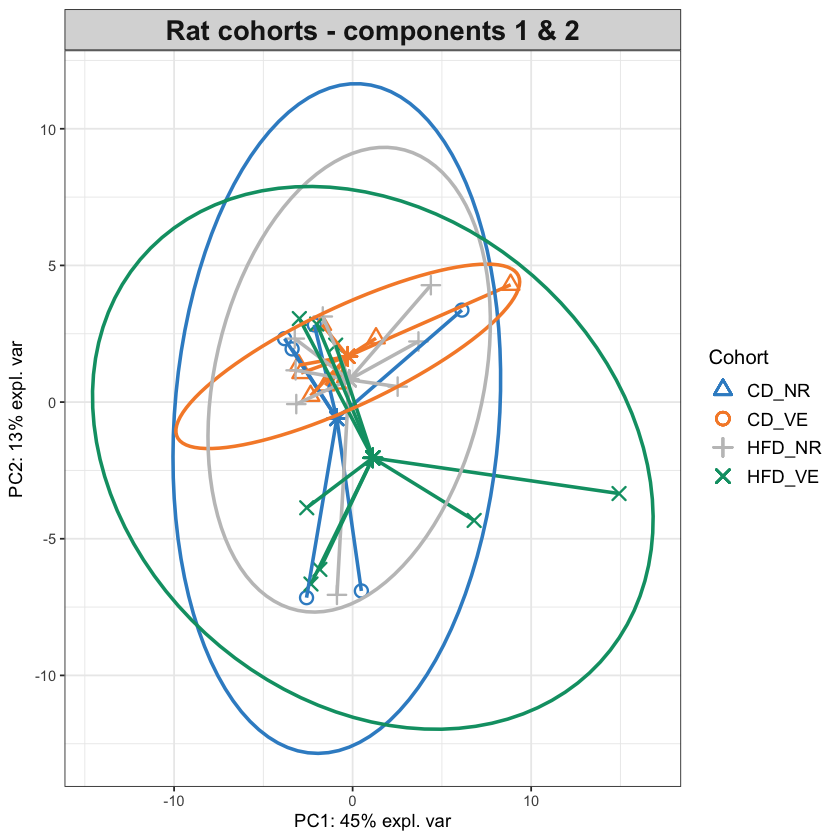

In [30]:
plotIndiv(res.spca, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 1 & 2",
          ind.names = FALSE)

##### Components 1 & 3

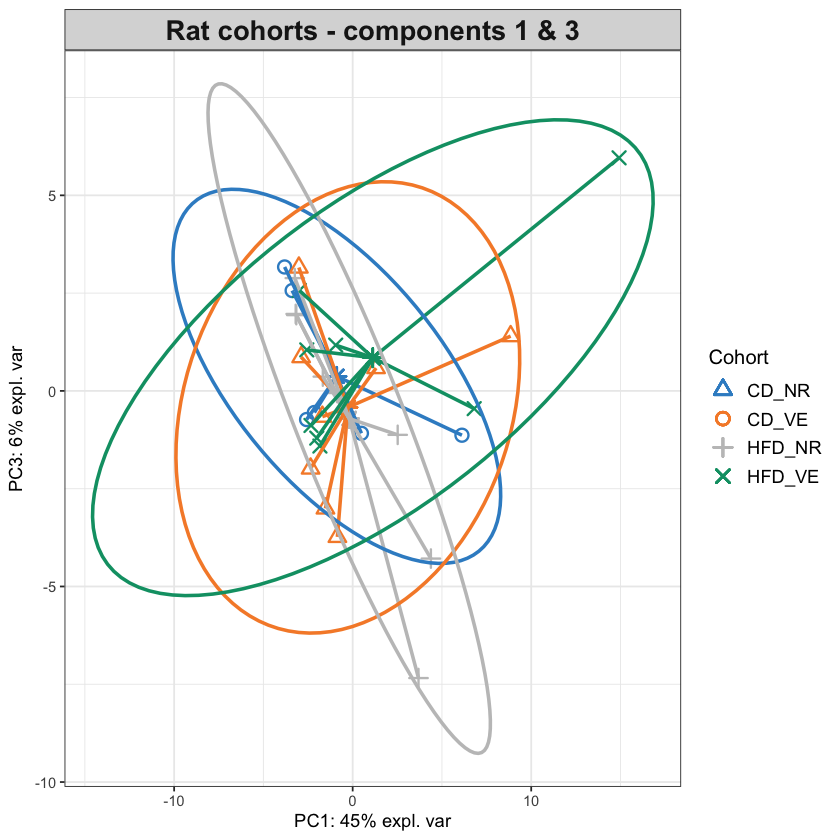

In [31]:
plotIndiv(res.spca, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 1 & 3",
          ind.names = FALSE,
         comp = c(1,3))

##### Components 2 & 3

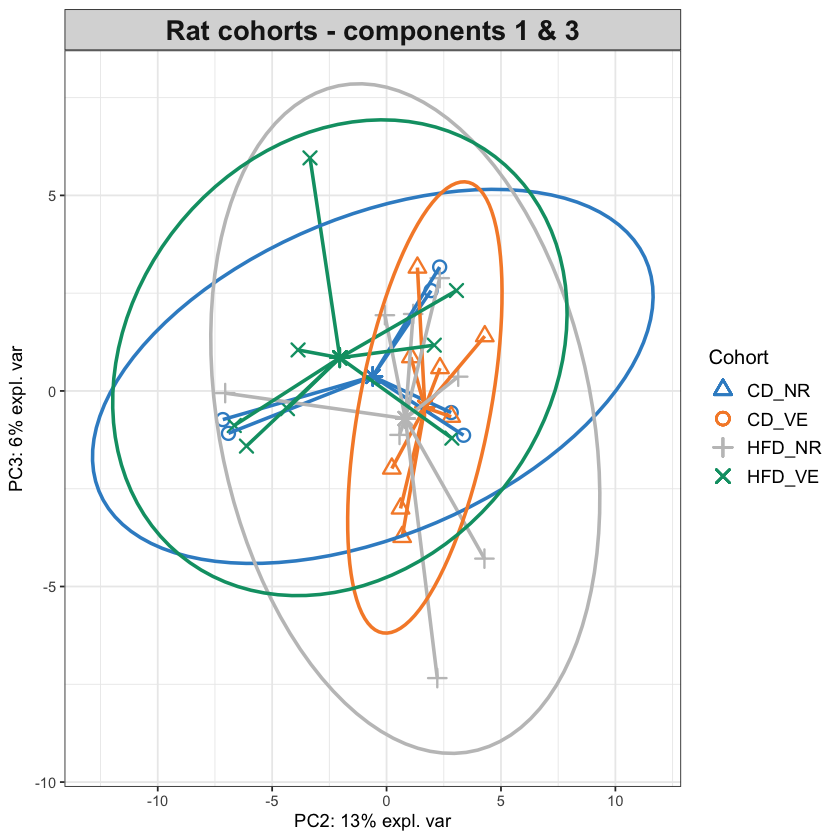

In [33]:
plotIndiv(res.spca, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 1 & 3",
          ind.names = FALSE,
         comp = c(2,3))

#### Varibale plots

##### Correlation circle plot

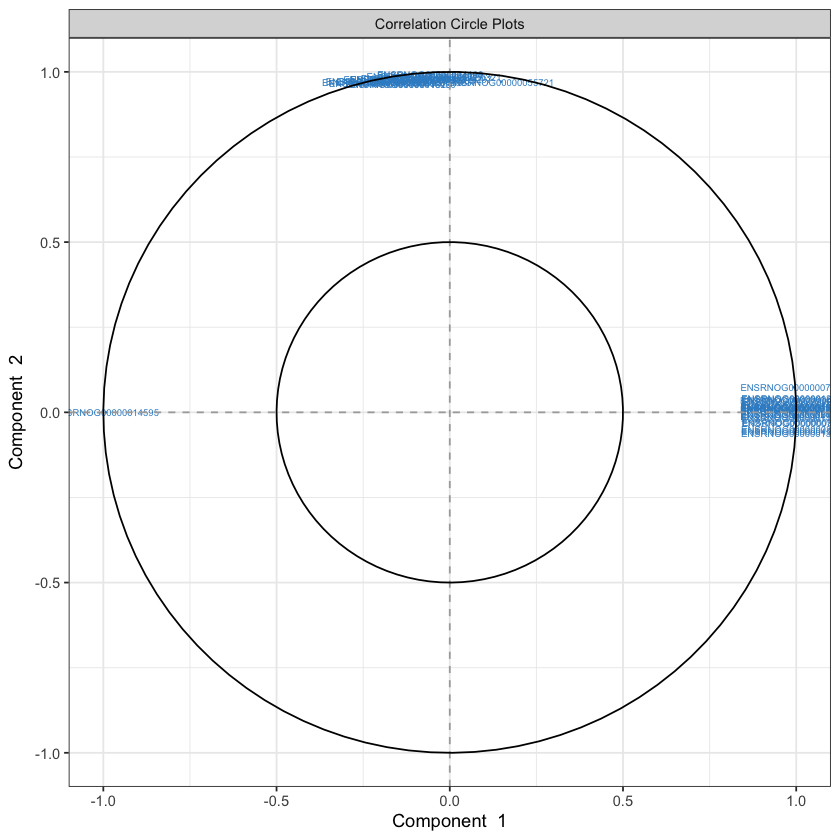

In [35]:
plotVar(res.spca, cex = 2, cutoff = 0.7) 

### PLS-DA

- PLS-Discriminant Analysis (PLS-DA, Barker and Rayens, 2003) is a linear classification model that is able to predict the class of new samples.

- sparse PLS-DA (sPLS-DA) enables the selection of the most predictive or discriminative features in the data that help classify the samples (Lê Cao et al., 2011).

In [16]:
X <- as.matrix(data$genes)
Y <- as.factor(data$metadata$Cohort)

In [37]:
plsda.res <- plsda(X, Y, ncomp = 18)

In [38]:
perf.plsda <- perf(plsda.res, validation = "Mfold", folds = 5, 
                  progressBar = TRUE, auc = TRUE, nrepeat = 100) 


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%
comp 6 
  |======================================================================| 100%
comp 7 
  |======================================================================| 100%
comp 8 
  |======================================================================| 100%
comp 9 
  |======================================================================| 100%
comp 10 
  |======================================================================| 100%
comp 11 
  |======================================================================| 100%
comp 12 
  |=================

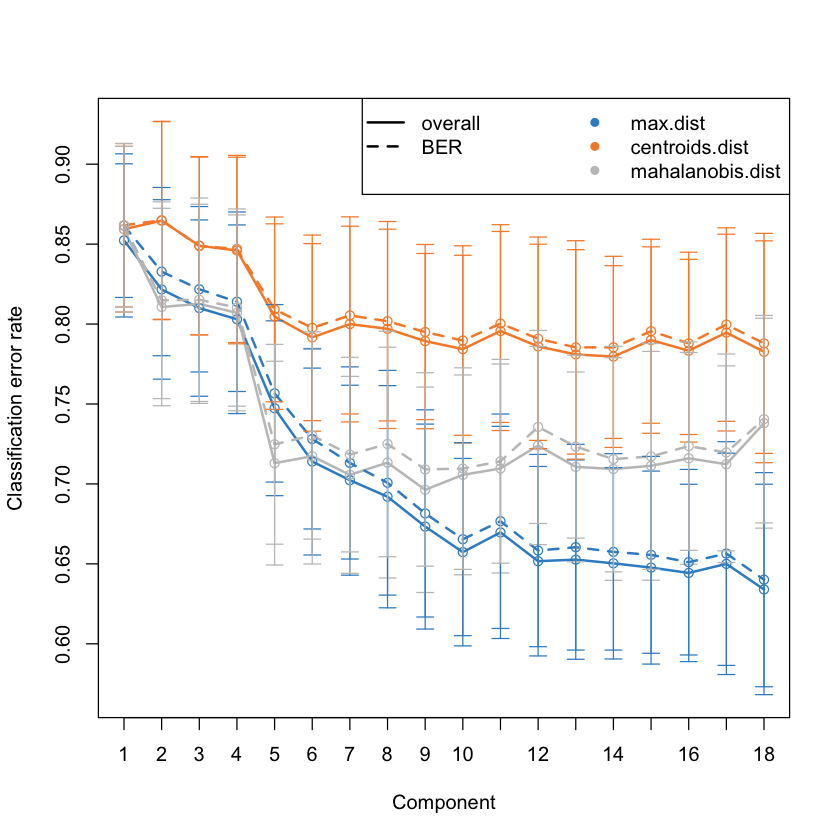

In [39]:
plot(perf.plsda, col = color.mixo(1:3), sd = TRUE, legend.position = "horizontal")

$Comp1
                      AUC p-value
CD_NR vs Other(s)  0.5764 0.56850
CD_VE vs Other(s)  0.5739 0.54210
HFD_NR vs Other(s) 0.6023 0.39860
HFD_VE vs Other(s) 0.7386 0.04887

$Comp2
                      AUC  p-value
CD_NR vs Other(s)  0.5903 0.500300
CD_VE vs Other(s)  0.6023 0.398600
HFD_NR vs Other(s) 0.6648 0.173800
HFD_VE vs Other(s) 0.8352 0.005658

$Comp3
                      AUC   p-value
CD_NR vs Other(s)  0.6528 2.540e-01
CD_VE vs Other(s)  0.9773 8.168e-05
HFD_NR vs Other(s) 0.9545 1.755e-04
HFD_VE vs Other(s) 0.8864 1.427e-03

$Comp4
                      AUC   p-value
CD_NR vs Other(s)  0.7083 1.198e-01
CD_VE vs Other(s)  0.9886 5.502e-05
HFD_NR vs Other(s) 0.9886 5.502e-05
HFD_VE vs Other(s) 1.0000 3.675e-05

$Comp5
                      AUC   p-value
CD_NR vs Other(s)  0.9931 2.322e-04
CD_VE vs Other(s)  0.9943 4.501e-05
HFD_NR vs Other(s) 0.9886 5.502e-05
HFD_VE vs Other(s) 1.0000 3.675e-05

$Comp6
                   AUC   p-value
CD_NR vs Other(s)    1 1.892e-04
CD

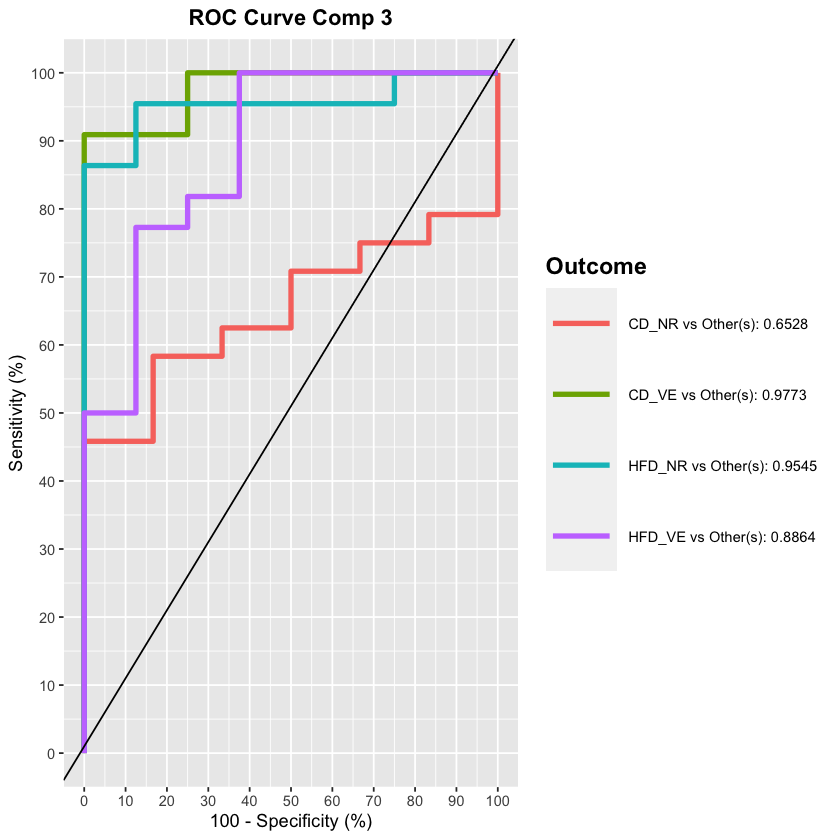

In [111]:
auc.plsda <- auroc(plsda.res, roc.comp = 3)

In [110]:
? auroc

#### sPLS-DA for variable selection
##### Tuning sPLS-DA

In [41]:
# grid of possible keepX values that will be tested for each comp 
list.keepX <- c(seq(10, 100, 10))

tune.splsda <- tune.splsda(X, Y, ncomp = 10, validation = 'Mfold', folds = 5, 
                           progressBar = TRUE, dist = 'max.dist',
                           test.keepX = list.keepX, nrepeat = 100) #nrepeat 50-100 for better estimate
# tune.splsda.srbct  #the various outputs


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%
comp 6 
  |======================================================================| 100%
comp 7 
  |======================================================================| 100%
comp 8 
  |======================================================================| 100%
comp 9 
  |======================================================================| 100%
comp 10 
  |======================================================================| 100%


In [42]:
tune.splsda$choice.keepX

comp1  comp2  comp3  comp4  comp5  comp6  comp7  comp8  comp9 comp10 
    10     20     20     80     50     20     10    100     70     30

In [43]:
tune.splsda$choice.ncomp$ncomp

[1] 6

In [ ]:
choice.ncomp <- tune.splsda$choice.ncomp$ncomp
choice.keepX <- tune.splsda$choice.keepX[1:choice.ncomp]

In [45]:
splsda.res <- splsda(X, Y, ncomp = choice.ncomp, keepX = choice.keepX)

In [46]:
perf.splsda <- perf(splsda.res, validation = "Mfold", folds = 5, 
                  progressBar = TRUE, auc = TRUE, nrepeat = 100) 


comp 1 
  |======================================================================| 100%
comp 2 
  |======================================================================| 100%
comp 3 
  |======================================================================| 100%
comp 4 
  |======================================================================| 100%
comp 5 
  |======================================================================| 100%
comp 6 
  |======================================================================| 100%


In [61]:
? perf

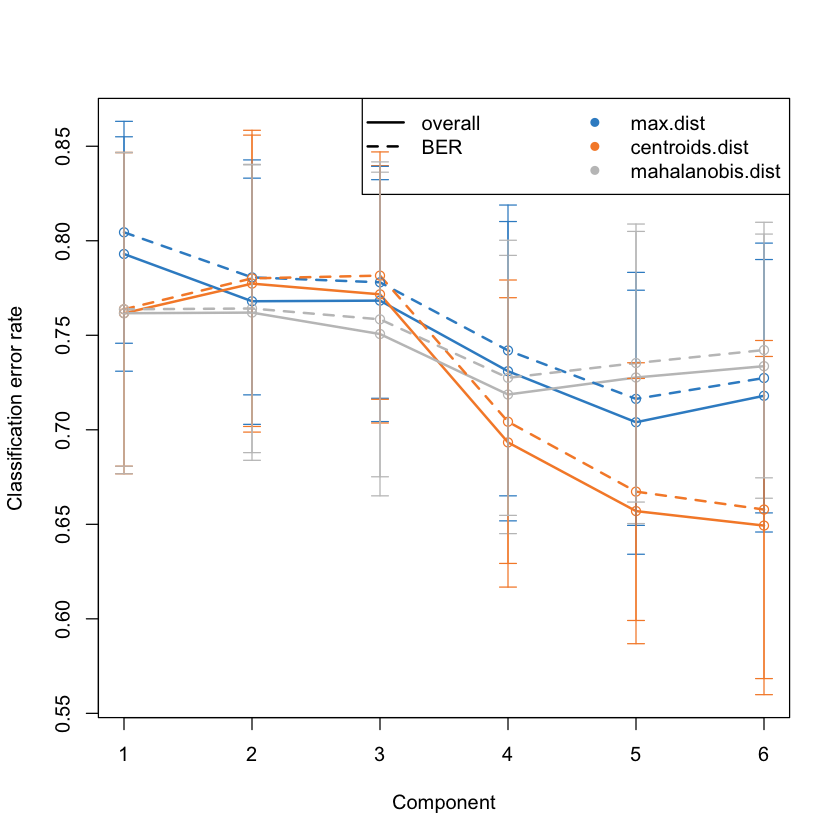

In [47]:
plot(perf.splsda, col = color.mixo(1:3), sd = TRUE, legend.position = "horizontal")

### sPLS-DA

Biological question :
- classify my samples into known groups
- predict the class of new samples
- identify the key variables that drive such discrimination

In [49]:
X <- data$genes
Y <- as.factor(data$metadata$Cohort)

In [60]:
splsda.res <- splsda(X, Y, keepX = choice.keepX, ncomp = choice.ncomp)

$Comp1
                      AUC  p-value
CD_NR vs Other(s)  0.9306 0.001306
CD_VE vs Other(s)  0.7841 0.019030
HFD_NR vs Other(s) 0.7557 0.034820
HFD_VE vs Other(s) 0.8807 0.001677

$Comp2
                      AUC   p-value
CD_NR vs Other(s)  0.9444 9.058e-04
CD_VE vs Other(s)  0.8580 3.131e-03
HFD_NR vs Other(s) 0.9943 4.501e-05
HFD_VE vs Other(s) 1.0000 3.675e-05

$Comp3
                      AUC   p-value
CD_NR vs Other(s)  1.0000 1.892e-04
CD_VE vs Other(s)  1.0000 3.675e-05
HFD_NR vs Other(s) 0.9943 4.501e-05
HFD_VE vs Other(s) 1.0000 3.675e-05

$Comp4
                   AUC   p-value
CD_NR vs Other(s)    1 1.892e-04
CD_VE vs Other(s)    1 3.675e-05
HFD_NR vs Other(s)   1 3.675e-05
HFD_VE vs Other(s)   1 3.675e-05

$Comp5
                   AUC   p-value
CD_NR vs Other(s)    1 1.892e-04
CD_VE vs Other(s)    1 3.675e-05
HFD_NR vs Other(s)   1 3.675e-05
HFD_VE vs Other(s)   1 3.675e-05

$Comp6
                   AUC   p-value
CD_NR vs Other(s)    1 1.892e-04
CD_VE vs Other(s)    1

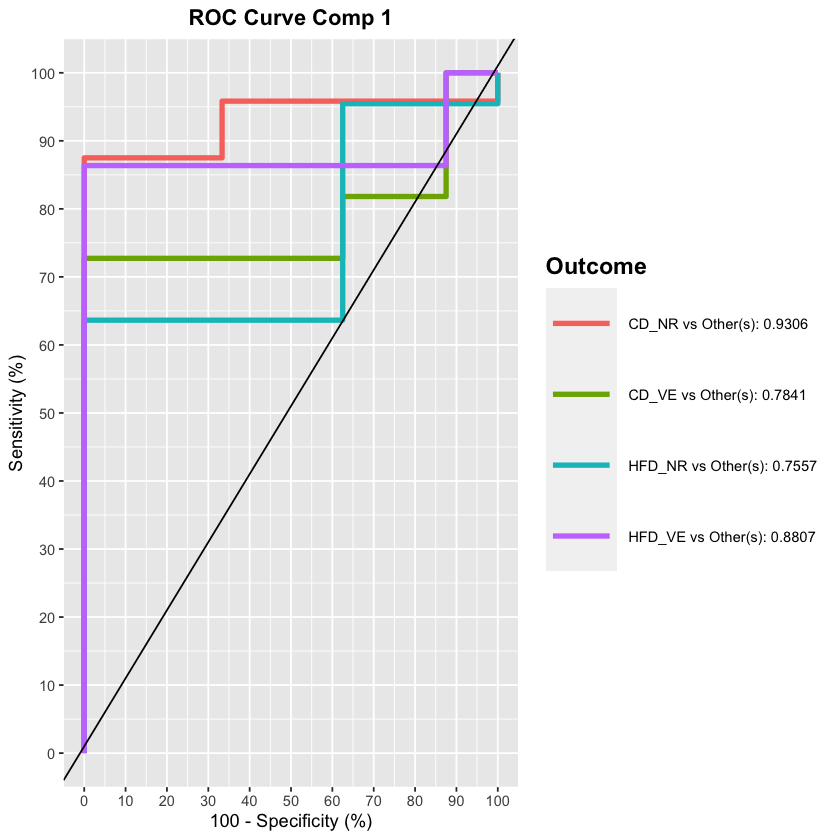

In [58]:
auc.splsda <- auroc(splsda.res)

#### Sample plots

##### Components 1 & 2

In [70]:
cohorts = factor(data$metadata$Cohort, levels = c("CD_VE", "CD_NR", "HFD_VE", "HFD_NR"))

In [75]:
colors = c("#000000","#929292","#0037ea","#00b5ff")

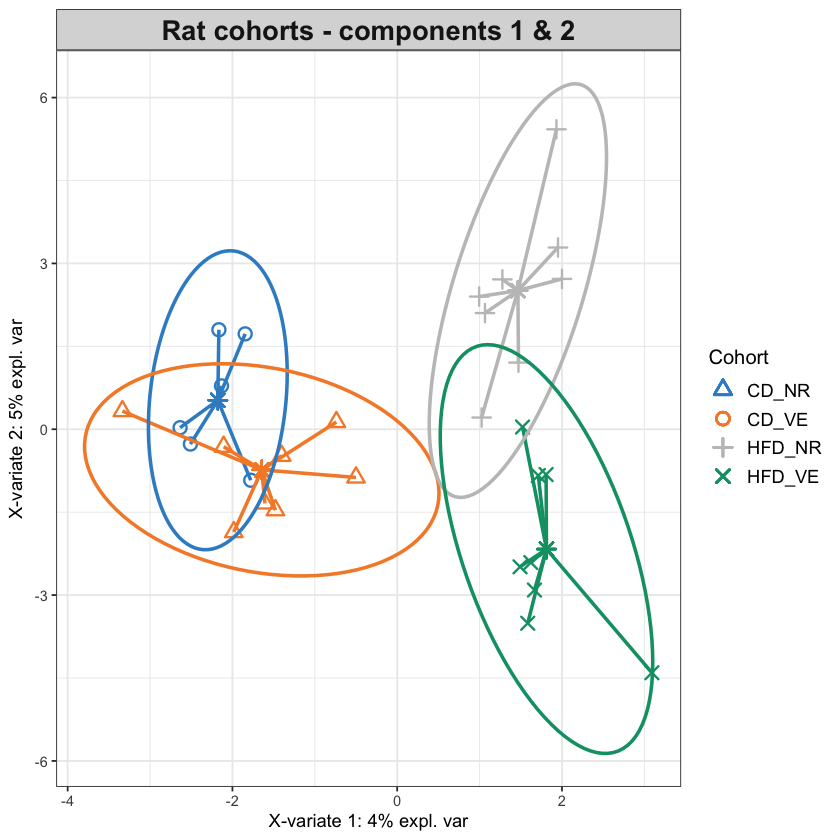

In [86]:
plotIndiv(splsda.res, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 1 & 2",
          ind.names = FALSE) 

##### Components 1 & 3

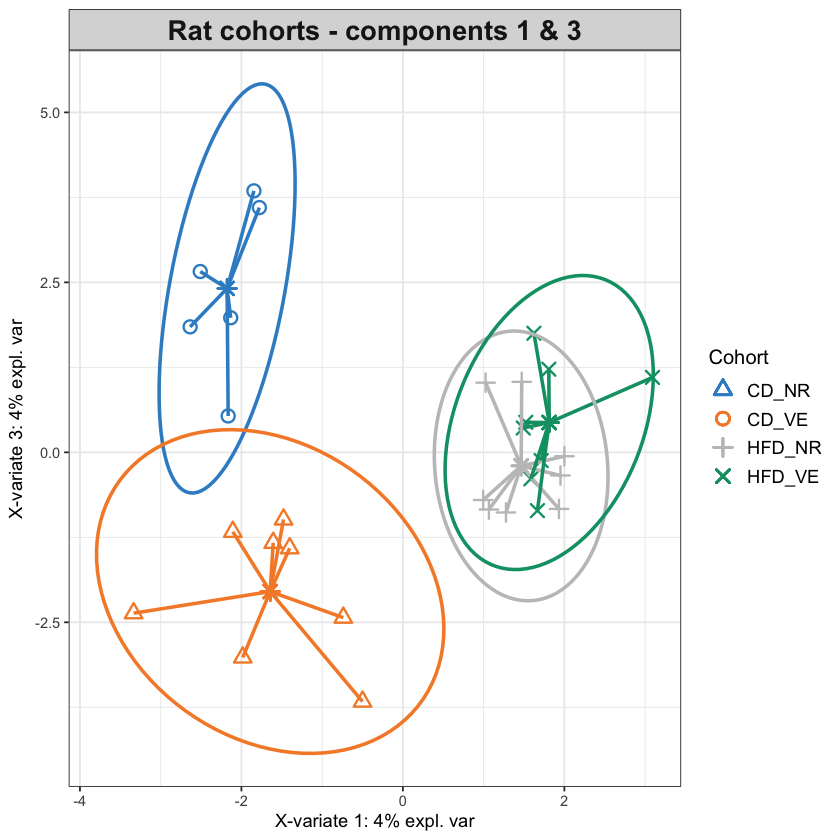

In [87]:
plotIndiv(splsda.res, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 1 & 3",
          ind.names = FALSE,
          comp = c(1,3)) 

##### Components 2 & 3

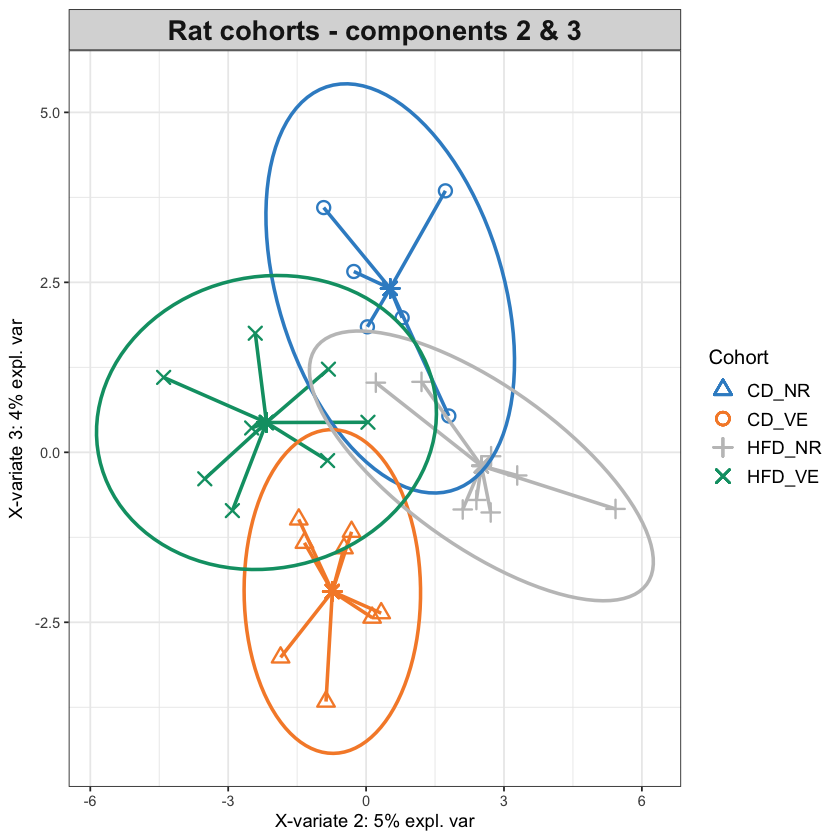

In [88]:
plotIndiv(splsda.res, 
          group = data$metadata$Cohort, 
          legend = TRUE,
          legend.title = "Cohort",
          ellipse = TRUE,
          centroid = TRUE,
          star = TRUE,
          title = "Rat cohorts - components 2 & 3",
          ind.names = FALSE,
          comp = c(2,3)) 

In [67]:
? plotIndiv

#### Variable plots

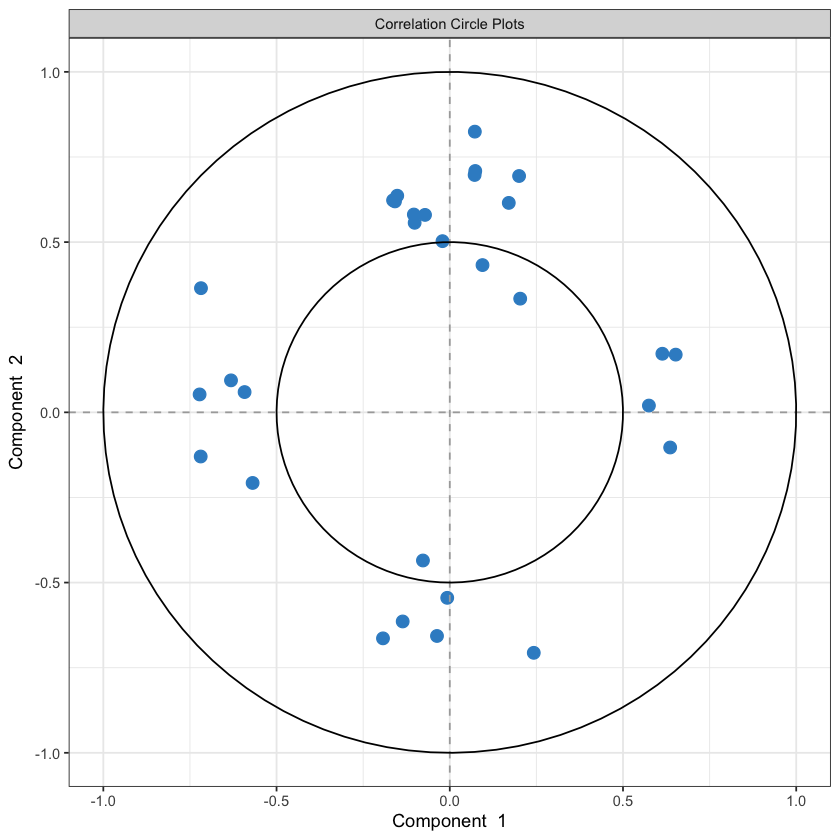

In [89]:
plotVar(splsda.res, pch = 20)

'ndisplay' value is larger than the number of selected variables! It has been reseted to 10 for block X

Warning message in if (col.ties %in% legend.color[1:nlevels(Y)]) stop("'col.ties' should not be in 'legend.color'"):
“the condition has length > 1 and only the first element will be used”


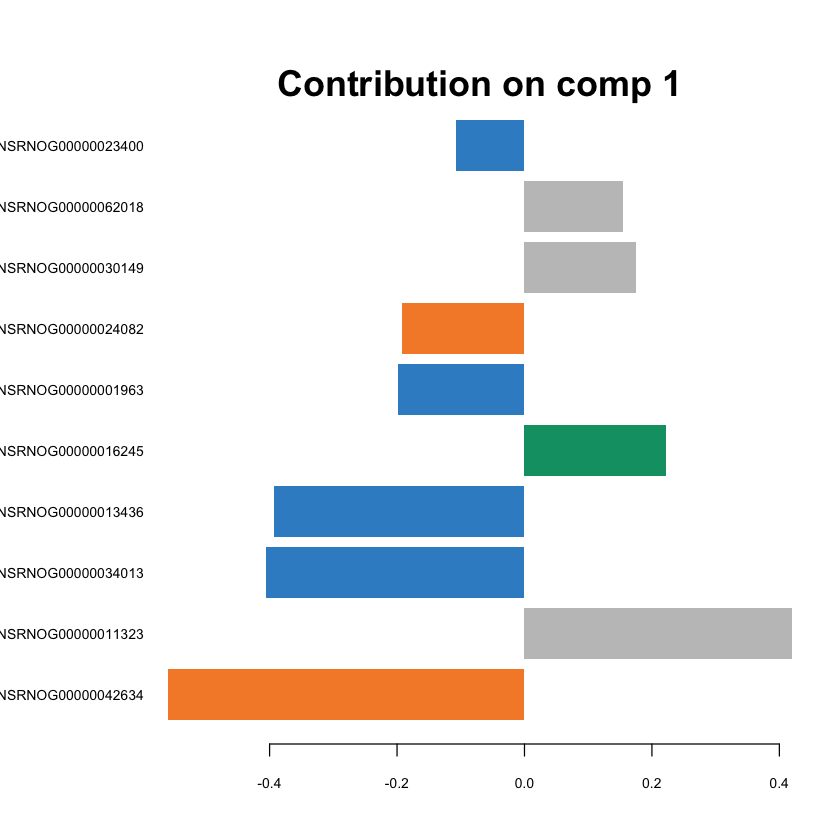

In [90]:
plotLoadings(splsda.res, contrib = 'max', method = 'mean', 
             col = colors, legend = FALSE, ndisplay = 100)

In [100]:
selectVar(splsda.res, comp = 1)$value

,value.var
,<dbl>
ENSRNOG00000042634,-0.5594403
ENSRNOG00000011323,0.4198354
ENSRNOG00000034013,-0.4063985
ENSRNOG00000013436,-0.3923654
ENSRNOG00000016245,0.2221497
ENSRNOG00000001963,-0.1978926
ENSRNOG00000024082,-0.1922502
ENSRNOG00000030149,0.1750716
ENSRNOG00000062018,0.1546559


'ndisplay' value is larger than the number of selected variables! It has been reseted to 20 for block X



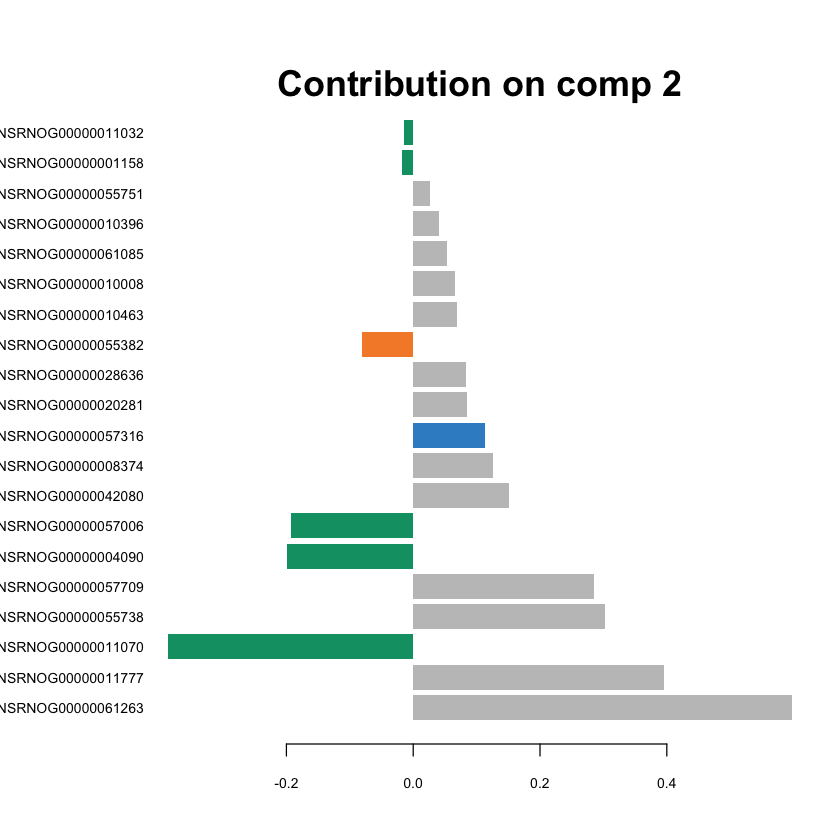

In [91]:
plotLoadings(splsda.res, comp = 2, contrib = 'max', method = 'mean', legend = FALSE, ndisplay = 100)

In [101]:
selectVar(splsda.res, comp = 2)$value

,value.var
,<dbl>
ENSRNOG00000061263,0.59744158
ENSRNOG00000011777,0.39631224
ENSRNOG00000011070,-0.38675488
ENSRNOG00000055738,0.30287298
ENSRNOG00000057709,0.28437290
ENSRNOG00000004090,-0.19860111
ENSRNOG00000057006,-0.19321524
ENSRNOG00000042080,0.15162204
ENSRNOG00000008374,0.12562557


#### Background prediction

In [96]:
background <- background.predict(splsda.res, comp.predicted = 2, dist = "max.dist") 

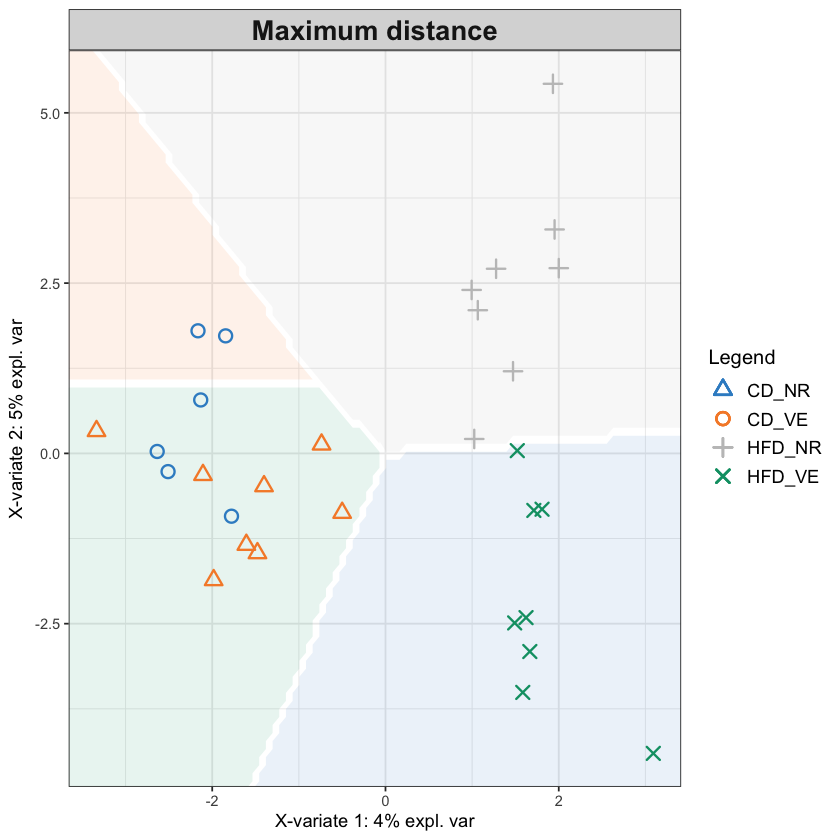

In [97]:
plotIndiv(splsda.res, comp = 1:2, group = Y,
          ind.names = FALSE, title = "Maximum distance",
          legend = TRUE,  background = background)

In [93]:
? background.predict

#### ROC

$Comp1
                      AUC  p-value
CD_NR vs Other(s)  0.9306 0.001306
CD_VE vs Other(s)  0.7841 0.019030
HFD_NR vs Other(s) 0.7557 0.034820
HFD_VE vs Other(s) 0.8807 0.001677

$Comp2
                      AUC   p-value
CD_NR vs Other(s)  0.9444 9.058e-04
CD_VE vs Other(s)  0.8580 3.131e-03
HFD_NR vs Other(s) 0.9943 4.501e-05
HFD_VE vs Other(s) 1.0000 3.675e-05

$Comp3
                      AUC   p-value
CD_NR vs Other(s)  1.0000 1.892e-04
CD_VE vs Other(s)  1.0000 3.675e-05
HFD_NR vs Other(s) 0.9943 4.501e-05
HFD_VE vs Other(s) 1.0000 3.675e-05

$Comp4
                   AUC   p-value
CD_NR vs Other(s)    1 1.892e-04
CD_VE vs Other(s)    1 3.675e-05
HFD_NR vs Other(s)   1 3.675e-05
HFD_VE vs Other(s)   1 3.675e-05

$Comp5
                   AUC   p-value
CD_NR vs Other(s)    1 1.892e-04
CD_VE vs Other(s)    1 3.675e-05
HFD_NR vs Other(s)   1 3.675e-05
HFD_VE vs Other(s)   1 3.675e-05

$Comp6
                   AUC   p-value
CD_NR vs Other(s)    1 1.892e-04
CD_VE vs Other(s)    1

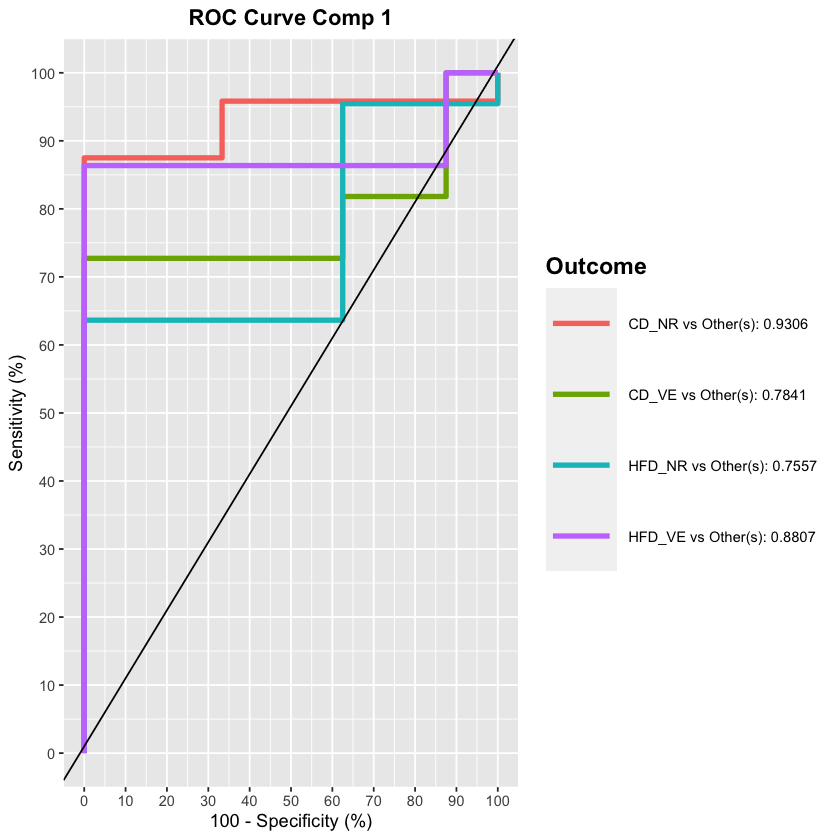

In [98]:
auc.plsda <- auroc(splsda.res)